In [ ]:

!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)


     |████████████████████████████████| 591.8 MB 590 bytes/s 
     |████████████████████████████████| 23.3 MB 76.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.5 MB/s 
     |████████████████████████████████| 22.1 MB 1.7 MB/s 
     |████████████████████████████████| 17.4 MB 212 kB/s 
     |████████████████████████████████| 17.3 MB 75 kB/s 
     |████████████████████████████████| 12.8 MB 24.4 MB/s 
     |████████████████████████████████| 12.7 MB 18.9 MB/s 
     |████████████████████████████████| 11.8 MB 33.5 MB/s 
     |████████████████████████████████| 5.9 MB 43.6 MB/s 
     |████████████████████████████████| 6.6 MB 26.7 MB/s 
     |████████████████████████████████| 6.6 MB 32.9 MB/s 
     |████████████████████████████████| 4.0 MB 35.1 MB/s 
     |████████████████████████████████| 10.2 MB 23.9 MB/s 
     |████████████████████████████████| 10.1 MB 25.6 MB/s 
     |████████████████████████████████| 8.8 MB 37.4 MB/s 
     

### 1. Data Preparation

**Data Set**  
$$X_{train} \in \mathcal{R}^{50000 \times 784}, Y_{train} \in \mathcal{Z}^{50000}$$  
$$X_{val} \in \mathcal{R}^{10000 \times 784}, Y_{val} \in \mathcal{Z}^{10000}$$  
$$X_{test} \in \mathcal{R}^{10000 \times 784}, Y_{test} \in \mathcal{Z}^{10000}$$

In [ ]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn


batch_size = 128
train_dataset = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_dataset =  datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])
print(len(train_dataset), len(val_dataset), len(test_dataset))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

50000 10000 10000


### Inspecting Dataset

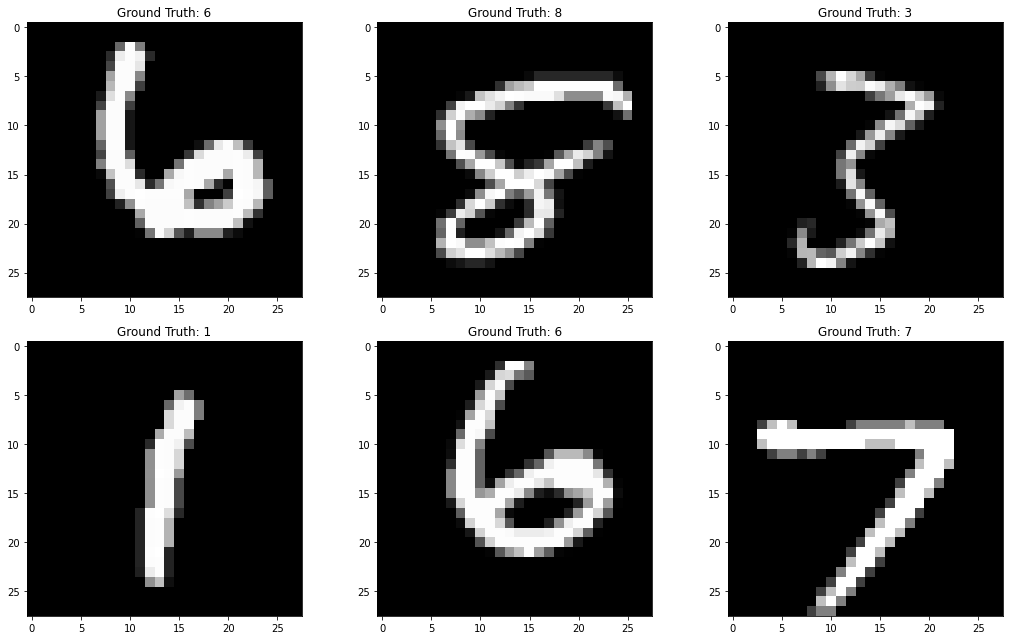

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)  

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
plt.show()

### 2. Model Architecture

In [ ]:
# MNIST 이미지 하나의 크기는 [28*28]입니다. 그리고 MNIST 데이터셋의 클래스 갯수는 10개입니다.
# 이를 참고하여 한 층으로 구성된 linear model을 생성하기 위해서 빈칸 채우세요.

class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        # ------------------빈 칸------------------#
        self.linear = nn.Linear(784,10)
        # -----------------------------------------#
    
    def forward(self, x):
        # ------------------빈 칸------------------#
        x = self.linear(x)
        # -----------------------------------------#
        return x

### 3. Cost Function Define (Loss Function Define)  

In [ ]:
cls_loss = nn.CrossEntropyLoss()

### 4. Train & Evaluation

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score


model = LinearModel()
print('Number of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

epoch = 30
for i in range(epoch):
    
    train_loss = 0
    model.train() 
    
    for input_X, true_y in train_loader:
        optimizer.zero_grad() 
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
        input_X = input_X.view(-1,28*28)
        # -----------------------------------------#
        pred_y = model(input_X)

        loss = cls_loss(pred_y.squeeze(), true_y)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.detach().numpy()
    train_loss = train_loss / len(train_loader)
    list_train_loss.append(train_loss)
    list_epoch.append(i)
    
    
    val_loss = 0
    model.eval()

    
    with torch.no_grad(): 
        for input_X, true_y in val_loader:
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
            input_X = input_X.view(-1,28*28)
        # -----------------------------------------#
            pred_y = model(input_X)

            loss = cls_loss(pred_y.squeeze(), true_y)
            val_loss += loss.detach().numpy()
        val_loss = val_loss / len(val_loader)
        list_val_loss.append(val_loss)



    correct = 0
    model.eval()

    with torch.no_grad():
        for input_X, true_y in test_loader:
        # ------------------빈 칸------------------#
        # 입력 데이터 처리
          input_X = input_X.view(-1,28*28)
        
          pred_y = model(input_X)
        
        # 모델 출력 결과를 이용하여 모델이 이미지를 제대로 맞춘 개수를 출력하는 correct를 구현하세요
          _,predicted = torch.max(pred_y.data , 1)
          correct += (predicted == true_y).sum()
        
        # -----------------------------------------#
        acc = correct.numpy() / len(test_loader.dataset)
        list_acc.append(acc)
        list_acc_epoch.append(i)
    
    print('Epoch: {}, Train Loss: {}, Val Loss: {}, Test Acc: {}%'.format(i, train_loss, val_loss, acc*100))

Number of 7850 parameters
Epoch: 0, Train Loss: 0.7544454075491337, Val Loss: 0.48504350947428354, Test Acc: 87.92%
Epoch: 1, Train Loss: 0.44174113541917726, Val Loss: 0.40798912961271744, Test Acc: 89.48%
Epoch: 2, Train Loss: 0.3921063420031687, Val Loss: 0.3749084380231326, Test Acc: 90.41%
Epoch: 3, Train Loss: 0.36732678614613956, Val Loss: 0.3568108387385743, Test Acc: 90.63%
Epoch: 4, Train Loss: 0.35146263116003607, Val Loss: 0.3445723258619067, Test Acc: 90.86999999999999%
Epoch: 5, Train Loss: 0.3406162676985002, Val Loss: 0.33584156858770153, Test Acc: 91.11%
Epoch: 6, Train Loss: 0.33216371282439705, Val Loss: 0.3287719520209711, Test Acc: 91.24%
Epoch: 7, Train Loss: 0.3255694047416872, Val Loss: 0.3237553846232499, Test Acc: 91.3%
Epoch: 8, Train Loss: 0.32003060017552826, Val Loss: 0.3196427435437335, Test Acc: 91.49000000000001%
Epoch: 9, Train Loss: 0.3155776904443341, Val Loss: 0.3155242729036114, Test Acc: 91.60000000000001%
Epoch: 10, Train Loss: 0.3116304688822582

### 5. Report Experiment  

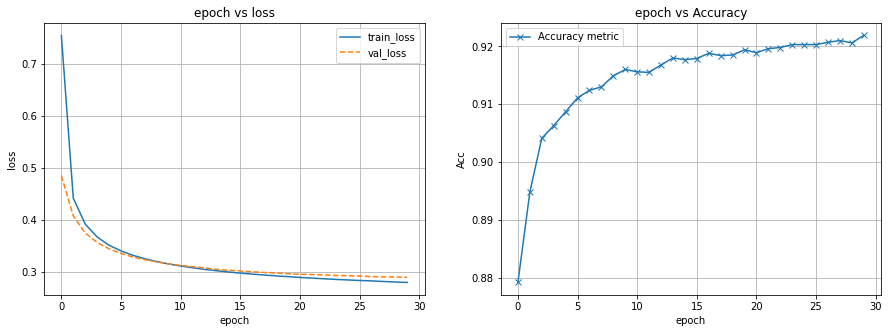

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()